In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [8]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_clean.csv')
ds.head()

,Unnamed: 0,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Partly Cloudy,Humid,Rain,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
0,0,0.506975,0.89,0.360609,0.699164,15.8263,0.491705,1,0,1,...,0,0,0,0,0,0,0,2006,3,22
1,1,0.505085,0.86,0.364309,0.721448,15.8263,0.499837,1,0,1,...,0,0,0,0,0,0,0,2006,3,23
2,2,0.505445,0.89,0.100329,0.568245,14.9569,0.504880,0,0,1,...,0,0,0,0,0,1,0,2006,4,0
3,3,0.487805,0.83,0.360197,0.749304,15.8263,0.512524,1,0,1,...,0,0,0,0,0,0,0,2006,4,1
4,4,0.495365,0.83,0.282072,0.721448,15.8263,0.514151,0,0,1,...,0,0,0,0,0,1,0,2006,4,2


### Determine the target change and characteristics

In [9]:
X = ds.drop(['Humidity'], axis=1)
y = ds['Humidity']

### Divide the dataset into training and test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choose the best model for my dataset.

In [11]:
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

algo = [xgbt,lm,ridge,lasso,knn,rf,dtree]

result = []

for i in algo:
        start = time.process_time()
        ml_model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(round(time.process_time()-start,3)),"sec")

result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor ✓     3.672 sec
LinearRegression ✓     1.125 sec
Ridge ✓     0.031 sec
Lasso ✓     0.031 sec
KNeighborsRegressor ✓     95.609 sec
RandomForestRegressor ✓     42.359 sec
DecisionTreeRegressor ✓     0.641 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
RandomForestRegressor_baseline,0.983596,0.881038,2.507009e-02,0.067480,1.799868e-02,0.048817
XGBRegressor_baseline,0.902367,0.877750,6.116188e-02,0.068407,4.575627e-02,0.050670
KNeighborsRegressor_baseline,0.918085,0.844959,5.602292e-02,0.077037,3.889641e-02,0.054788
DecisionTreeRegressor_baseline,1.000000,0.751500,2.401071e-17,0.097530,3.277594e-18,0.066329
LinearRegression_baseline,0.588824,0.582909,1.255155e-01,0.126354,9.947303e-02,0.099508
Ridge_baseline,0.588822,0.582900,1.255157e-01,0.126355,9.947487e-02,0.099513
Lasso_baseline,0.001521,0.002227,1.955927e-01,0.195429,1.628552e-01,0.163001


##### There are three metrics to chosse the best model for my data set: Score, RMSE and MAE.

##### Score measures how much of the variation in the dependent variable is explained by the independent variables, so I need to find the highest test score.

##### RMSE Measures the average error of the model's predictions. This is the average of the squared difference between the actual and predicted values, so I need to find the lowest test RMSE.

##### MAE Measures the average absolute error between actual and predicted values, so I need to lowest the highest test MAE.

### So I chose the RandomForestRegressor model because it met all my requirements.

### The values that have the greatest impact on the model.

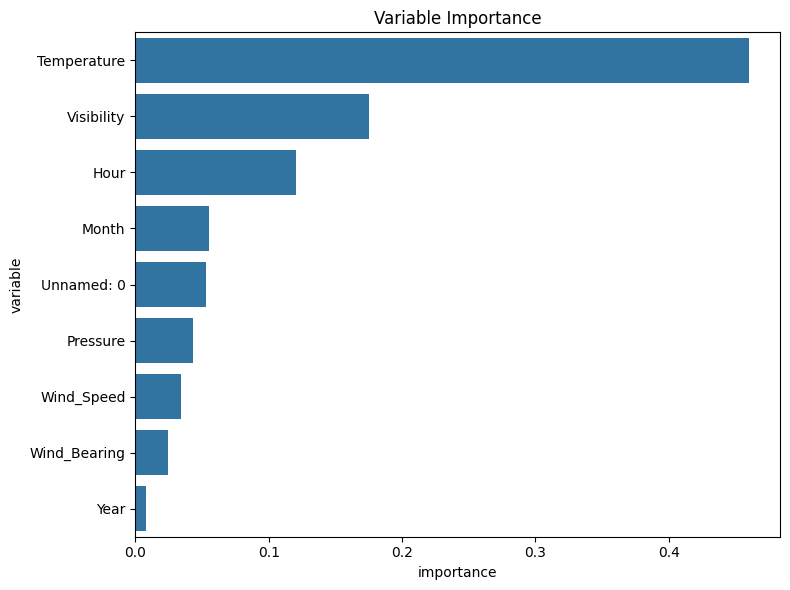

In [12]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:9])
plt.title('Variable Importance')
plt.tight_layout()